# Sample workflow: irrigated vs. non-irrigated corn yields
---
Aaron Anderson <br>
https://github.com/anderaa/quickerstats

---

In this example, we will demonstrate how to use the quickerstats package to search for and download data from the NASS Quick Stats database. Our goal will be to produce a maps that separate irrigated and non-irrigated corn yields.

---
## 1. Installation and setup

Install the package from the current github repo, then load it:

In [1]:
devtools::install_github('anderaa/quickerstats', force=TRUE, build_vignettes=TRUE, ref='development')
library('quickerstats')


✔  checking for file ‘/private/var/folders/xb/3_n3p00j4_x83n2s7tpn95gm0000gn/T/RtmpdQ7XlX/remotes266d6726f1a8/anderaa-quickerstats-7ec690c/DESCRIPTION’
─  preparing ‘quickerstats’:
✔  checking DESCRIPTION meta-information
─  installing the package to build vignettes
✔  creating vignettes (1m 34.1s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘quickerstats_0.0.0.9005.tar.gz’
   


Now setup your NASS key. Go to https://quickstats.nass.usda.gov/api and get your key. I recommend storing your key as an environmental variable. In R studio, type `file.edit("~/.Renviron")` and add `NASS_KEY='your_nass_key'` to the file. Alternatively, open a terminal (mac/linux) and type `nano ~/.Renviron` and add the same line. Save it with ctl+o then press enter. Then exit with ctl+x. You may need to restart your R session/kernel.

Now load the key into the current R session:

In [2]:
key = Sys.getenv('NASS_KEY')

In [3]:
library(maps)
library(maptools)
library(rgdal)
library(mapproj)
library(tmap)
library(tmaptools)
options(warn=-1)

Loading required package: sp
Checking rgeos availability: TRUE
rgdal: version: 1.4-6, (SVN revision 841)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.2, released 2019/06/28
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/proj
 Linking to sp version: 1.3-1 


---
## 2. Get non-irrigated corn data 
First, we need to search for the data item. We'll focus on corn for grain.

In [4]:
r <- search_data_items(key, search_terms=c('corn', 'irrigated'), exclude=c('sweet', 'silage'))
print(r)

 [1] "CORN, GRAIN, IRRIGATED - ACRES HARVESTED"                                        
 [2] "CORN, GRAIN, IRRIGATED - ACRES PLANTED, NET"                                     
 [3] "CORN, GRAIN, IRRIGATED - AREA HARVESTED, MEASURED IN PCT BY METHOD"              
 [4] "CORN, GRAIN, IRRIGATED - AREA HARVESTED, MEASURED IN PCT OF OPERATIONS BY METHOD"
 [5] "CORN, GRAIN, IRRIGATED - EAR COUNT, MEASURED IN EARS / ACRE"                     
 [6] "CORN, GRAIN, IRRIGATED - EAR COUNT, MEASURED IN STALKS / ACRE"                   
 [7] "CORN, GRAIN, IRRIGATED - OPERATIONS WITH AREA HARVESTED"                         
 [8] "CORN, GRAIN, IRRIGATED - PLANT POPULATION, MEASURED IN PLANTS / ACRE"            
 [9] "CORN, GRAIN, IRRIGATED - PRODUCTION, MEASURED IN BU"                             
[10] "CORN, GRAIN, IRRIGATED - WATER APPLIED, MEASURED IN ACRE FEET / ACRE"            
[11] "CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE"                           
[12] "CORN, GRAIN, IRRIGATED - Y

It looks like result number 32 is the one we want.

In [5]:
data_item <- r[32]
print(data_item)

[1] "CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE"


Let's check if this data is available from the most recent census. We can use `get_county_item_count` for this.

In [6]:
get_county_item_count(key, 2017, data_item)

[1] 0

Ok, so no data is available. We'll use `get_options` to see what our choices are.

In [7]:
get_options(key, data_item)

Retrieving options...this may take a minute...


source_desc,year,agg_level_desc,domain_desc
<chr>,<chr>,<chr>,<chr>
CENSUS,2013,STATE,IRRIGATION STATUS
SURVEY,1997,COUNTY,TOTAL
SURVEY,1997,STATE,TOTAL
SURVEY,1998,COUNTY,TOTAL
SURVEY,1998,STATE,TOTAL
SURVEY,1999,COUNTY,TOTAL
SURVEY,1999,STATE,TOTAL
SURVEY,2000,COUNTY,TOTAL
SURVEY,2000,STATE,TOTAL


Often, 'SURVEY' data does not have good coverage. Let's check and see how many counties are covered.

In [8]:
get_county_item_count(key, 2017, data_item, source='SURVEY')

[1] 124

That's not very many, so we'll have to use state data instead. Let's get the state-level data from the 2013 census. Note (in the table above) that the domain is not 'TOTAL' for this option. We'll have to specify that explicitly in the function call.

In [9]:
non_irrigated = get_state_data(key, 2013, data_item, domain='IRRIGATION STATUS', source='CENSUS')

Parsed with column specification:
cols(
  .default = col_character(),
  asd_code = col_logical(),
  asd_desc = col_logical(),
  county_ansi = col_logical(),
  county_code = col_logical(),
  county_name = col_logical(),
  region_desc = col_logical(),
  zip_5 = col_logical(),
  watershed_desc = col_logical(),
  congr_district_code = col_logical(),
  country_code = col_double(),
  year = col_double(),
  week_ending = col_logical(),
  load_time = col_datetime(format = ""),
  `CV (%)` = col_logical()
)
See spec(...) for full column specifications.


In [10]:
head(non_irrigated)

source_desc,sector_desc,group_desc,commodity_desc,class_desc,prodn_practice_desc,util_practice_desc,statisticcat_desc,unit_desc,short_desc,⋯,location_desc,year,freq_desc,begin_code,end_code,reference_period_desc,week_ending,load_time,Value,CV (%)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<lgl>
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,ALABAMA,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,147,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,ARKANSAS,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,104,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,COLORADO,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,41,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,CONNECTICUT,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,(D),NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,DELAWARE,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,145,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,NON-IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, NON-IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,FLORIDA,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,89,NA


---
## 3. Get irrigated corn data

In [11]:
data_item <- r[11]
print(data_item)

[1] "CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE"


In [12]:
irrigated = get_state_data(key, 2013, data_item, domain='IRRIGATION STATUS', source='CENSUS')

[1] "No data exists for this particular query.\n          Try modifying query paramters."


Oops, let's see what our options are since our request from non-irrigated did not work for irrigated.

In [13]:
get_options(key, data_item)

Retrieving options...this may take a minute...


source_desc,year,agg_level_desc,domain_desc
<chr>,<chr>,<chr>,<chr>
CENSUS,2013,STATE,"IRRIGATION METHOD, PRIMARY"
CENSUS,2013,STATE,TOTAL
CENSUS,2018,STATE,"IRRIGATION METHOD, PRIMARY"
CENSUS,2018,STATE,TOTAL
SURVEY,1997,COUNTY,TOTAL
SURVEY,1997,STATE,TOTAL
SURVEY,1998,COUNTY,TOTAL
SURVEY,1998,STATE,TOTAL
SURVEY,1999,COUNTY,TOTAL


Looks like we just need to switch the domain back to 'TOTAL'. Since that is the default argument in `get_state_data`, we can leave it out of the function call.

In [14]:
irrigated = get_state_data(key, year=2013, "CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE", source='CENSUS')

Parsed with column specification:
cols(
  .default = col_character(),
  asd_code = col_logical(),
  asd_desc = col_logical(),
  county_ansi = col_logical(),
  county_code = col_logical(),
  county_name = col_logical(),
  region_desc = col_logical(),
  zip_5 = col_logical(),
  watershed_desc = col_logical(),
  congr_district_code = col_logical(),
  country_code = col_double(),
  year = col_double(),
  week_ending = col_logical(),
  load_time = col_datetime(format = ""),
  `CV (%)` = col_logical()
)
See spec(...) for full column specifications.


In [15]:
head(irrigated)

source_desc,sector_desc,group_desc,commodity_desc,class_desc,prodn_practice_desc,util_practice_desc,statisticcat_desc,unit_desc,short_desc,⋯,location_desc,year,freq_desc,begin_code,end_code,reference_period_desc,week_ending,load_time,Value,CV (%)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<lgl>
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,ALABAMA,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,199,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,ARIZONA,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,212,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,ARKANSAS,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,189,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,CALIFORNIA,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,199,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,COLORADO,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,188,NA
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,IRRIGATED,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN, IRRIGATED - YIELD, MEASURED IN BU / ACRE",⋯,DELAWARE,2013,ANNUAL,00,00,YEAR,NA,2012-12-31,198,NA


---
## 4. Map the data

In [16]:
# replace (D) values with NA and convert the 'Value' column from strings to numbers
non_irrigated[non_irrigated$Value == '(D)', 'Value'] = NA
non_irrigated$Value <- as.numeric(gsub(",", "", non_irrigated$Value))

irrigated[irrigated$Value == '(D)', 'Value'] = NA
irrigated$Value <- as.numeric(gsub(",", "", irrigated$Value))

In [17]:
f <- tempfile()
download.file("http://www2.census.gov/geo/tiger/GENZ2010/gz_2010_us_040_00_20m.zip", destfile = f)
unzip(f, exdir = ".")
US <- readOGR("gz_2010_us_040_00_20m.shp", layer='gz_2010_us_040_00_20m')

# remove PR, AK, HI
US <- US[!(US$STATE %in% c("02","15","72")),]

OGR data source with driver: ESRI Shapefile 
Source: "/Users/aaronanderson/NWRC/quickerstats/notebooks/gz_2010_us_040_00_20m.shp", layer: "gz_2010_us_040_00_20m"
with 52 features
It has 5 fields


In [18]:
US_irrigated <- append_data(US, irrigated, key.shp = "STATE", key.data = "state_fips_code")
US_non_irrigated <- append_data(US, non_irrigated, key.shp = "STATE", key.data = "state_fips_code")

Under coverage: 6 out of 49 shape features did not get appended data. Run under_coverage() to get the corresponding feature id numbers and key values.
Over coverage: 1 out of 44 data records were not appended. Run over_coverage() to get the corresponding data row numbers and key values.
Under coverage: 8 out of 49 shape features did not get appended data. Run under_coverage() to get the corresponding feature id numbers and key values.


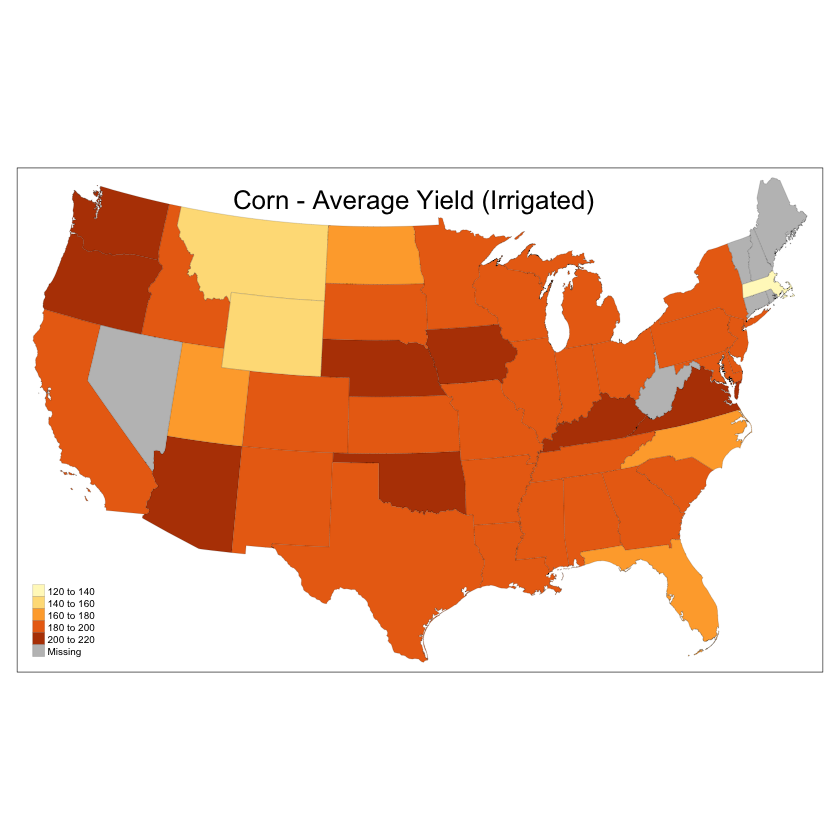

In [19]:
tm_shape(US_irrigated, projection="+init=epsg:2163") +
  tm_polygons("Value", border.col = "black", lwd=0.1, title="") +
  tmap_options(max.categories = 5) +
tm_layout(title="Corn - Average Yield (Irrigated)", 
          title.position = c("center", "top"),
          legend.text.size=0.5)

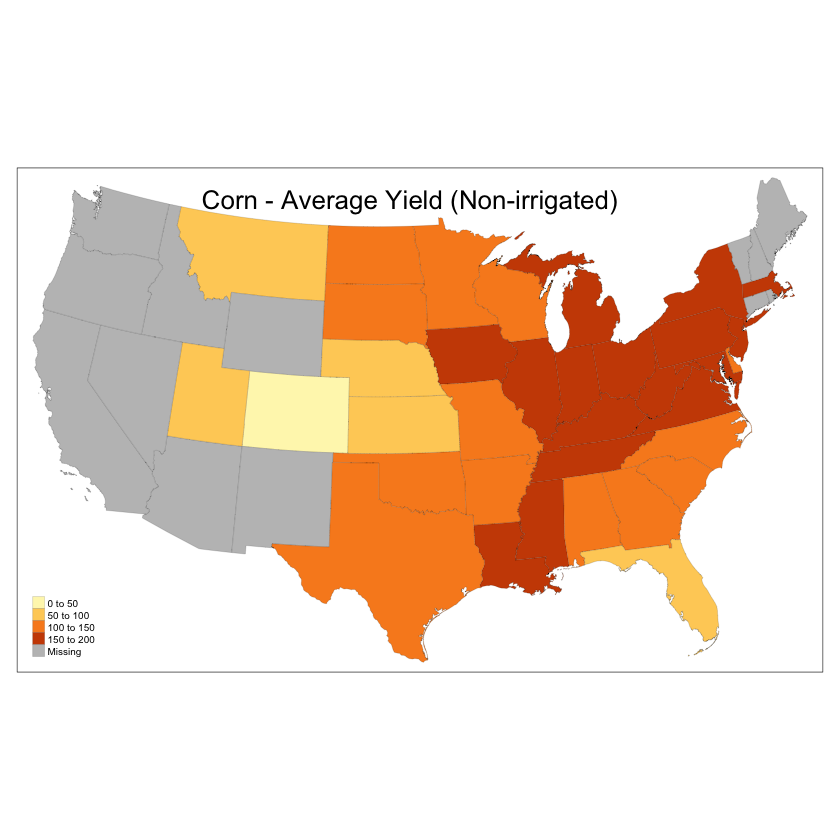

In [21]:
tm_shape(US_non_irrigated, projection="+init=epsg:2163") +
  tm_polygons("Value", border.col = "black", lwd=0.1, title="") +
  tmap_options(max.categories = 5) +
tm_layout(title="Corn - Average Yield (Non-irrigated)", 
          title.position = c("center", "top"),
          legend.text.size=0.5)

---